<a href="https://colab.research.google.com/github/Bhupendra-glitch/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment Prediction

**1.1 Introduction**

Taking a look at twitter, there are a lot of tweets generated every single second by different users. In addition, some of these tweets might be positive while the others might be negative. It would be really useful if machine learning and deep learning is deployed in real-time to classify the texts and tweets as positive, negative or neutral respectively. As a result of this, a lot of time and money would be saved by the company without the need to use manpower for these simple tasks respectively.

In this machine learning project, we would be working with real-time twitter tweets and predicting the sentiment of the text whether it is positive, negative or neutral. With the help of deep neural networks along with hyperparameter tuning, we would be classifying the tweets, ensuring that there is a good business value for the company by analyzing the text and understanding the working of machine learning models.

**1.2 Metrics**

1.  Acuuracy
2.  Precision
1.  Recall

**1.3 Source**

The dataset is taken from Kaggle. It is available in the website below. Feel free to download the dataset.

https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

#Table of Content


Reading the data
Countplot of the Sentiment
Positive Text WordCloud
Negative Text WordCloud
List of Stopwords
Dividing the data into training and Cross Validation Data
Function for Replacing Words
Preprocessing the Text
Tfidf Vectorizer
Neural Network Model for Prediction
Count Vectorizer
Neural Network Model
Plots of the Results
Conclusion

*Let us now start the project by reading some useful libraries that we would be working with from the start.*



















In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
!pip install wordcloud

#1. Reading the data
We would be first reading the data that is present in the kaggle repository to ensure that we work with it.

In [4]:
df = pd.read_csv('/content/Tweets.csv')

Reading the head of the dataframe, we see that there are different columns such as textID, text, selected_text and the output that we are going to be predict which is sentiment respectively.

In [5]:
df.head()


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


We would be dropping the selected text as the test set does not contain those values. It would be good to leave only the text for the machine learning models for predictions respectively.

In [6]:
df.drop(['selected_text'], axis = 1, inplace = True)


Since we have removed the *selected text*, we are only left with the actual text values along with the sentiment whether it is positive, negative or neutral output respectively.

In [8]:
df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


#2. Countplot of the Sentiment

As can be seen, there seems to be more neutral sentiment in the text compared to positive or negative tweets. That is true in real life as most of the tweets would be quite neutral without them being either too positive or too negative respectively.



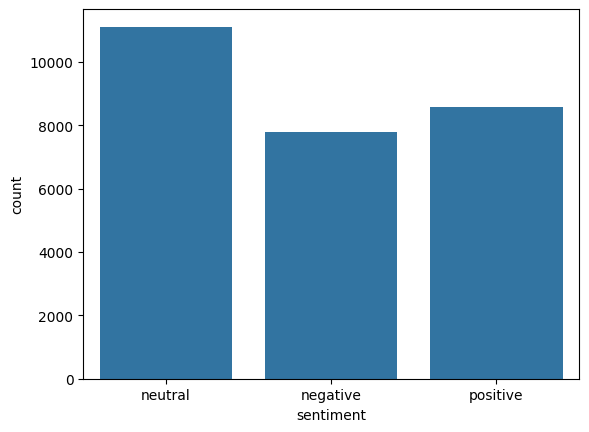

In [9]:
sns.countplot(x = 'sentiment', data = df)
plt.show()

Taking a look at the shape of the data, we see that there are about 27k data points that we are going to be working and applying our knowledge.

In [10]:
df.shape


(27481, 3)

Reading a few lines in a particular row of the text, we see that it is quite a simple tweet without being too lengthy.



In [11]:
df['text'].iloc[0]


' I`d have responded, if I were going'

Taking a look at the total number of characters from a single text, we see that there are about 36 characters respectively.



In [12]:
len(df['text'].iloc[0])


36

Let us now read the head of the text and see the values that are present to understand the working of the machine learning models respectively.

In [14]:
df['text'].head()


,text
0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."


Looking at the information present in our dataframe, we can see that almost all the values are not-null except a few that we are going to be clearing to ensure that those values don't interfere in the machine learning models and predictions respectively.



In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


In [16]:
df['text'].iloc[0]


' I`d have responded, if I were going'

In [17]:
text_length_list = []
for i in range(len(df)):
    if isinstance(df['text'].iloc[i], float) == True:
        print(df['text'].iloc[i])

nan


In [19]:
isinstance("Bhupendra", float)


False

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


In [21]:
df.dropna(inplace = True)


In [22]:
df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27480 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27480 non-null  object
dtypes: object(3)
memory usage: 858.8+ KB


In [23]:
df['text_length'] = df['text'].apply(lambda x: len(x))


In [24]:
df.head()


,textID,text,sentiment,text_length
0,cb774db0d1,"I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46
2,088c60f138,my boss is bullying me...,negative,25
3,9642c003ef,what interview! leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75


In [25]:
df['text_words'] = df['text'].apply(lambda x: len(x.split()))


In [26]:
df.head()




,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [27]:
df.head()


,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [28]:
## Taking separate dataframes for different values such as positive, negative and neutral reviews respectively.

positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']
neutral_df = df[df['sentiment'] == 'neutral']

In [29]:
print("The shape of the dataframe that contains only the positive reviews is: {}".format(positive_df.shape))
print("The shape of the dataframe that contains only the negative reviews is: {}".format(negative_df.shape))
print("The shape of the dataframe that contains only the neutral reviews is:  {}".format(neutral_df.shape))

The shape of the dataframe that contains only the positive reviews is: (8582, 5)
The shape of the dataframe that contains only the negative reviews is: (7781, 5)
The shape of the dataframe that contains only the neutral reviews is:  (11117, 5)


In [30]:
wordcloud = WordCloud(width = 500, height = 500)


In [31]:
df.head()


,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [32]:
positive_df.head()


,textID,text,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


In [33]:
positive_text = []
for i in range(len(positive_df)):
    positive_text.append(positive_df['text'].iloc[i])

In [34]:
positive_text[:5]


['2am feedings for the baby are fun when he is all smiles and coos',
 ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
 'I really really like the song Love Story by Taylor Swift',
 'Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet',
 'the free fillin` app on my ipod is fun, im addicted']

#3. Positive Text WordCloud

Worcloud gives us a good idea about the number of repeating words by the size of them. We see that there are some positive words such as "thank" and "good "which make up most of the positive reviews. There are also some words that occur quite rare such as "awesome" but these words also make a mark in the decisions respectively. In addition to this, we also find that there are very few words that are negative in the positive text. Therefore, we can conclude that words are a good indication of the polarity and sentiment of the text respectively.

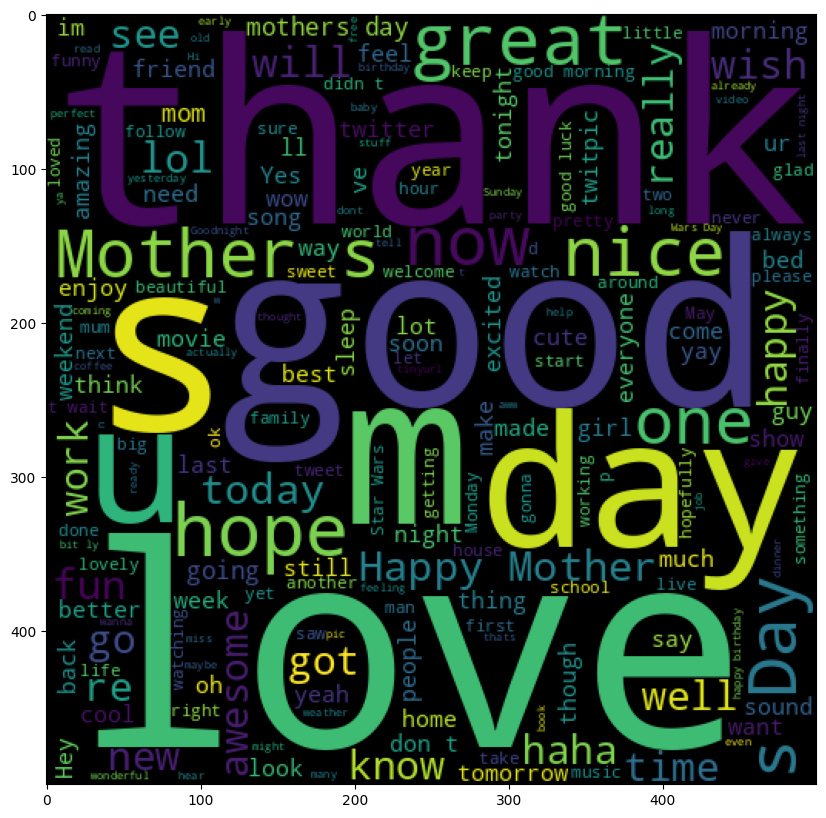

In [37]:
# wordcloud = WordCloud(stopwords = stopwords)
wordcloud.generate(''.join(positive_text))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

In [38]:

negative_text = []
for i in range(len(negative_df)):
    negative_text.append(negative_df['text'].iloc[i])

In [39]:
negative_text[0: 5]


[' Sooo SAD I will miss you here in San Diego!!!',
 'my boss is bullying me...',
 ' what interview! leave me alone',
 ' Sons of ****, why couldn`t they put them on the releases we already bought',
 'My Sharpie is running DANGERously low on ink']

#4. Negative Text WordCloud

As can be seen in the wordcloud, there are some words such as "miss" and "no" which are considered to be negative respectively. In addition to this, we see that there are some words such as "work" and "sorry" that also tend to be negative as this is quite true in real-life where we say "sorry" for some negative things done and so on. Therefore, getting the wordcloud would ensure that we get to know the words present in the wordcloud dictionary and ensure that we understand the full context of the review respectively.

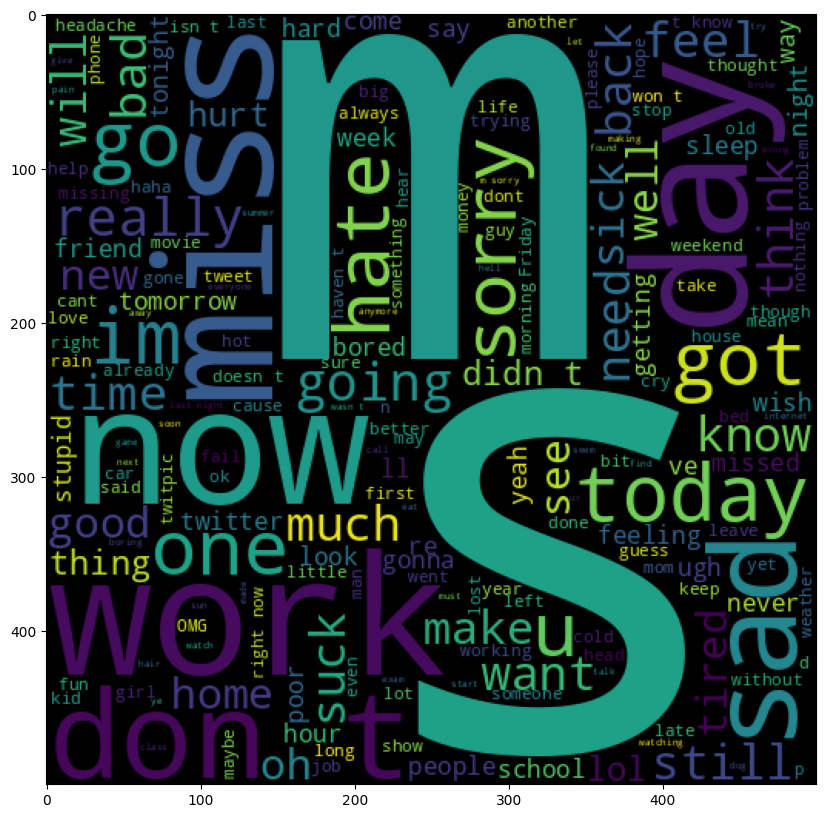

In [42]:
# wordcloud = WordCloud(stopwords = stopwords, background_color = 'white')
wordcloud.generate(''.join(negative_text))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

In [43]:
df.head()


,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [44]:
positive_df.head()


,textID,text,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


In [45]:
negative_df.head()


,textID,text,sentiment,text_length,text_words
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,negative,44,8


In [48]:
positive_df.head()


,textID,text,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


In [49]:
negative_df.head()


,textID,text,sentiment,text_length,text_words
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,negative,44,8


from matplotlib import pyplot as plt
_df_24['text_length'].plot(kind='hist', bins=20, title='text_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['text_words'].plot(kind='hist', bins=20, title='text_words')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_26.groupby('textID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='text_length', y='text_words', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['text_length'].plot(kind='line', figsize=(8, 4), title='text_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['text_words'].plot(kind='line', figsize=(8, 4), title='text_words')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_31.groupby('textID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('textID')
_ = plt.ylabel('text')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_32['textID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_32, x='text_length', y='textID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='text_length', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['textID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='text_words', y='textID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='text_words', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#5. List of Stopwords

Let us now make a list of all the stopwords that we are going to be using for our machine learning purposes. We see that there are some good list of stopwords that I have taken from the link that is provided in the below cell. These would be used for the stopwords and ensure that we are getting the best results respectively.



In [50]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [51]:
df.head()


,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [52]:
df.drop(['textID'], axis = 1, inplace = True)


In [53]:
df.head()


,text,sentiment,text_length,text_words
0,"I`d have responded, if I were going",neutral,36,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,my boss is bullying me...,negative,25,5
3,what interview! leave me alone,negative,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [54]:
X = df.drop(['sentiment'], axis = 1)
y = df['sentiment']

#6. Dividing the Data into Training and Cross Validation Data

Now we are going to be dividing the data into training and cross validation data and ensure that we understand the machine learning model well. We are going to be dividing the data into 2 parts where 70 percent of the data is taken as the training data and the 30 percent of the data would be taken as the test data. There is a random state assigned to it and split to ensure that we get a good accuracy.



In [55]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 50)


In [56]:
X_train.shape


(19236, 3)

In [57]:
X_cv.shape


(8244, 3)

#7. Function for Replacing Words

There is a separate function that is being used to replace the words and substitute them with the other words to ensure that we get the best machine learning results respectively.

In [58]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [59]:
!pip install tqdm


#8. Preprocessing the Text

It is now time to preprocess the text and understand the output. We are going to be using the above functions and also estimate the time it takes to complete the entire preprocessing respectively. Taking into account the different preprocessing text values, we are going to be appending those values and understanding the output respectively.



In [60]:
# Combining all the above stundents
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentence in tqdm(X_train['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|██████████| 19236/19236 [00:01<00:00, 12652.68it/s]


In [61]:
preprocessed_text[0: 5]


['24 hours since dog put sleep rip old friend',
 'not feeling comfortable today',
 'hurray twin girls born beautiful may day',
 'bah h8 waking',
 'textmate crashed first time 3 months not bad actually textmate']

In [62]:
for i in range(len(X_train)):
    X_train['text'].iloc[i] = preprocessed_text[i]

In [63]:
X_train.head()


,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


In [64]:
# Combining all the above stundents
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentence in tqdm(X_cv['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|██████████| 8244/8244 [00:00<00:00, 11112.25it/s]


In [65]:
preprocessed_text[0: 5]


['mom happy present yayy',
 'no surprise probably know',
 'nope difference 5 omr c class anyone notice flight number wy flight lhr wy 911',
 'smells badly garlic',
 'friday whole different meaning work saturday sunday']

In [66]:
for i in range(len(X_cv)):
    X_cv['text'].iloc[i] = preprocessed_text[i]

In [67]:
X_cv.head()


,text,text_length,text_words
7214,mom happy present yayy,38,8
19840,no surprise probably know,67,11
19409,nope difference 5 omr c class anyone notice fl...,102,19
6600,smells badly garlic,25,5
7807,friday whole different meaning work saturday s...,78,14


In [68]:
binarizer = LabelBinarizer()
y_train_converted = binarizer.fit_transform(y_train)
binarizer = LabelBinarizer()
y_cv_converted = binarizer.fit_transform(y_cv)

In [69]:
y_cv_converted


array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])